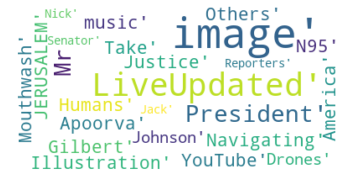

end of file


In [ ]:
!pip3 install spacy
!pip3 install newsapi-python
!python -m spacy download en_core_web_lg
import pandas as pd    
import collections
from collections import Counter
import pickle
from string import punctuation
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from newsapi import NewsApiClient
import spacy.cli
spacy.cli.download("en_core_web_lg")
import en_core_web_lg


# Loading spaCy model through variable
nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient (api_key='32b9abef18124b3cb3e241a96978aa93')
# Gets each article within 30 days to be used
def getSomething(x):
  temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2020-10-02', to='2020-11-02', sort_by='relevancy', page=x)
  return temp
# Storing articles
articles = list(map(getSomething, range(1,6)))

# Saving dataset using pickles
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = '/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))


title,description,content,dados,date = ([],[],[],[],[])

# Cleaning data by title, date, escription and content
for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        description = x['description']
        content = x['content']
        dados.append({'title':title, 'date':date,'desc':description, 'content':content})
       
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

# Recieves text and will handle spaCy model and will tage the keywords in our news articles
def get_keywords_eng(text):
  result = []
  doc = nlp_eng(text)
  pos_tag = ['VERB', 'NOUN', 'PROPN']

#  Extracting verbs, nouns and proper nouns
  for token in doc:
    if (token.text in nlp_eng.Defaults.stop_words or token.text in punctuation):
      continue
    if (token.pos_ in pos_tag):
      result.append(token.text)

    return result

results = []
# Obtaining keywords from content set from articls
for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

# Using WordCould to show covid-19 picture of text
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()